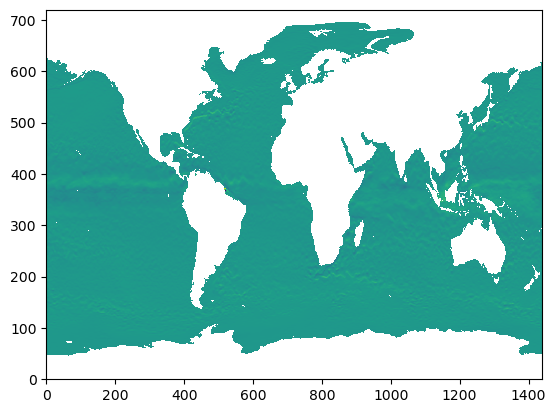

In [ ]:
from glob import glob
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import sys
sys.path.append('../..')
from src.mod_plot import *
from src.mod_stat import *
from src.mod_spectral import *
from src.mod_interp import *
import logging
logger = logging.getLogger()
logger.setLevel(logging.INFO)

#list_of_maps = sorted(glob('/Odyssey/private/t22picar/2023a_SSH_mapping_OSE/data/maps/DUACS_global_allsat-alg/dt_global_allsat_phy_l4_20190101_20220213.nc'))
#list_of_maps = "/Odyssey/private/t22picar/data/glorys_15m/glorys_15.81m_2019-01-01-2020-01-01.nc"
#ds_maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')

#list_of_maps = sorted(glob('/Odyssey/public/data_challenge_ssh_ose/data/maps/NeurOST_SSH_allsat-alg/NeurOST_SSH_allsat-alg_20191231_20240115.nc'))
#list_of_maps = "/Odyssey/private/t22picar/data/glorys_15m/glorys_15.81m_2019-01-01-2020-01-01.nc"
#ds_maps = xr.open_mfdataset(list_of_maps, combine='nested', concat_dim='time')

list_of_maps = '/Odyssey/private/t22picar/data/uv/globcurrent_15.00m_2019-01-01-2020-01-01.nc'
ds_maps = xr.open_dataset(list_of_maps)
#ds_maps = ds_maps.sel(time=slice(time_min, time_max))
ds_maps = ds_maps.sel(depth=ds_maps.depth[0])
ds_maps = ds_maps.sel(time=ds_maps.time[0])

plt.pcolormesh(ds_maps.uo[:,:])

In [13]:
folder_data_4th = "/Odyssey/private/t22picar/data/glorys_15m/"
file_glorys_4th = "glorys_15.81m_2019-01-01-2020-01-01_4th.nc"

maps_glo_4th = xr.open_dataset(folder_data_4th+file_glorys_4th)

# Original grid 1/12 (2041,4320) --> 1/4
new_sizes = [size // 3 for size in (2041, 4320)]
print('new sizes: {}'.format(new_sizes))

ds_maps = ds_maps.interp({"latitude":maps_glo_4th.lat, "longitude":maps_glo_4th.lon}, method="linear")

new sizes: [680, 1440]


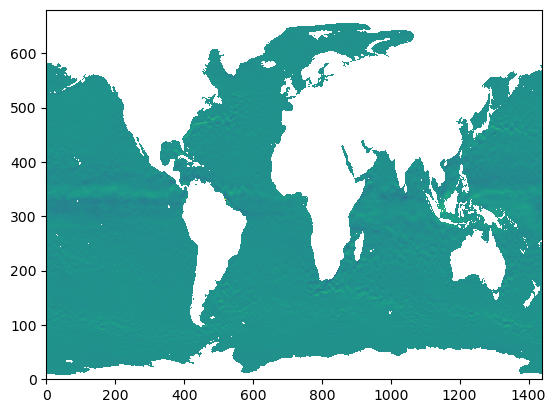

In [ ]:
plt.pcolormesh(ds_maps.uo[:,:])

In [16]:
lon,lat = np.meshgrid(ds_maps.lon, ds_maps.lat)

In [17]:
mask_equator = (lat > -5) & (lat < 5)
mask = np.where(np.isnan(ds_maps.uo),False,True)
mask = np.where(mask_equator,False,mask)
                

(680, 1440)


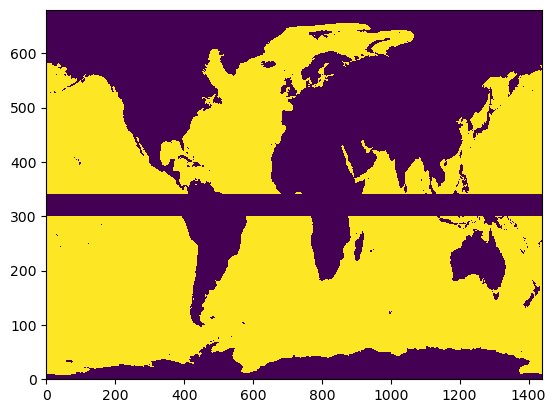

In [19]:
print(mask.shape)
plt.pcolormesh(mask[:,:])

In [21]:
np.save('mask_4th.npy', mask)